In [1]:
!pip install tensorflow==1.14.0
!pip install keras==2.0.8
!pip install h5py==2.10.0 
!pip install -r requirements.txt

In [2]:
import os 

#!git clone https://www.github.com/matterport/Mask_RCNN.git --depth=1

os.chdir('Mask_RCNN')

!rm -rf .git # to prevent an error when the kernel is committed
!rm -rf images assets # to prevent displaying images at the bottom of a kernel

os.chdir('..')


In [3]:
!wget  https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
!ls -lh mask_rcnn_coco.h5

--2023-02-27 17:07:51--  https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
Resolving github.com (github.com)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘github.com’
-rw-rw-r-- 1 rossignolle rossignolle 944K Feb 19 17:27 mask_rcnn_coco.h5


In [4]:
import os
import json

import sys
import glob

sys.path.append('Mask_RCNN')

from mrcnn.config import Config
from mrcnn import utils
import keras.engine as KE
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

/home/rossignolle/Memoire/ImplementRichie/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rossignolle/Memoire/ImplementRichie/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rossignolle/Memoire/ImplementRichie/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rossign

In [5]:
NUM_CATS = 46
IMAGE_SIZE = 512
COCO_WEIGHTS_PATH = 'mask_rcnn_coco.h5'

In [6]:

with open("label_descriptions.json") as f:
    label_descriptions = json.load(f)

label_names = [x['name'] for x in label_descriptions['categories']]

In [7]:
class FashionConfig(Config):
    NAME = "fashion"
    NUM_CLASSES = NUM_CATS + 1 # +1 for the background class
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 4 # a memory error occurs when IMAGES_PER_GPU is too high
    
    BACKBONE = 'resnet50'
    
    IMAGE_MIN_DIM = IMAGE_SIZE
    IMAGE_MAX_DIM = IMAGE_SIZE    
    IMAGE_RESIZE_MODE = 'none'
    
    RPN_ANCHOR_SCALES = (16, 32, 64, 128, 256)
    #DETECTION_NMS_THRESHOLD = 0.0
    
    # STEPS_PER_EPOCH should be the number of instances 
    # divided by (GPU_COUNT*IMAGES_PER_GPU), and so should VALIDATION_STEPS;
    # however, due to the time limit, I set them so that this kernel can be run in 9 hours
    STEPS_PER_EPOCH = 1000
    VALIDATION_STEPS = 200
    
config = FashionConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     4
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 4
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                59
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              none
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                

In [8]:

best_epoch = 3
glob_list = glob.glob(f'Extracting/content/fashion20220511T2012/mask_rcnn_fashion_{best_epoch:04d}.h5') #add path here
print(glob_list)
model_path = glob_list[0] if glob_list else ''
print(model_path)

['Extracting/content/fashion20220511T2012/mask_rcnn_fashion_0003.h5']
Extracting/content/fashion20220511T2012/mask_rcnn_fashion_0003.h5


In [9]:
class InferenceConfig(FashionConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

model = modellib.MaskRCNN(mode='inference', 
                          config=inference_config,
                          model_dir='./')

assert model_path != '', "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  Extracting/content/fashion20220511T2012/mask_rcnn_fashion_0003.h5


2023-02-27 17:08:11.169531: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-02-27 17:08:11.368455: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2294595000 Hz
2023-02-27 17:08:11.369115: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0xa56eb30 executing computations on platform Host. Devices:
2023-02-27 17:08:11.369185: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2023-02-27 17:08:12.309541: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) or se

Re-starting from epoch 3


In [10]:
NUM_CATS = 46
IMAGE_SIZE = 512

In [11]:
import numpy as np

# Since the submission system does not permit overlapped masks, we have to fix them
def refine_masks(masks, rois):
    areas = np.sum(masks.reshape(-1, masks.shape[-1]), axis=0)
    mask_index = np.argsort(areas)
    union_mask = np.zeros(masks.shape[:-1], dtype=bool)
    for m in mask_index:
        masks[:, :, m] = np.logical_and(masks[:, :, m], np.logical_not(union_mask))
        union_mask = np.logical_or(masks[:, :, m], union_mask)
    for m in range(masks.shape[-1]):
        mask_pos = np.where(masks[:, :, m]==True)
        if np.any(mask_pos):
            y1, x1 = np.min(mask_pos, axis=1)
            y2, x2 = np.max(mask_pos, axis=1)
            rois[m, :] = [y1, x1, y2, x2]
    return masks, rois

In [12]:
import os.path
from os import path
import cv2


def resize_image(image_path):
  if path.exists(image_path) :
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_AREA)  
    return img
  else :
    print("false")

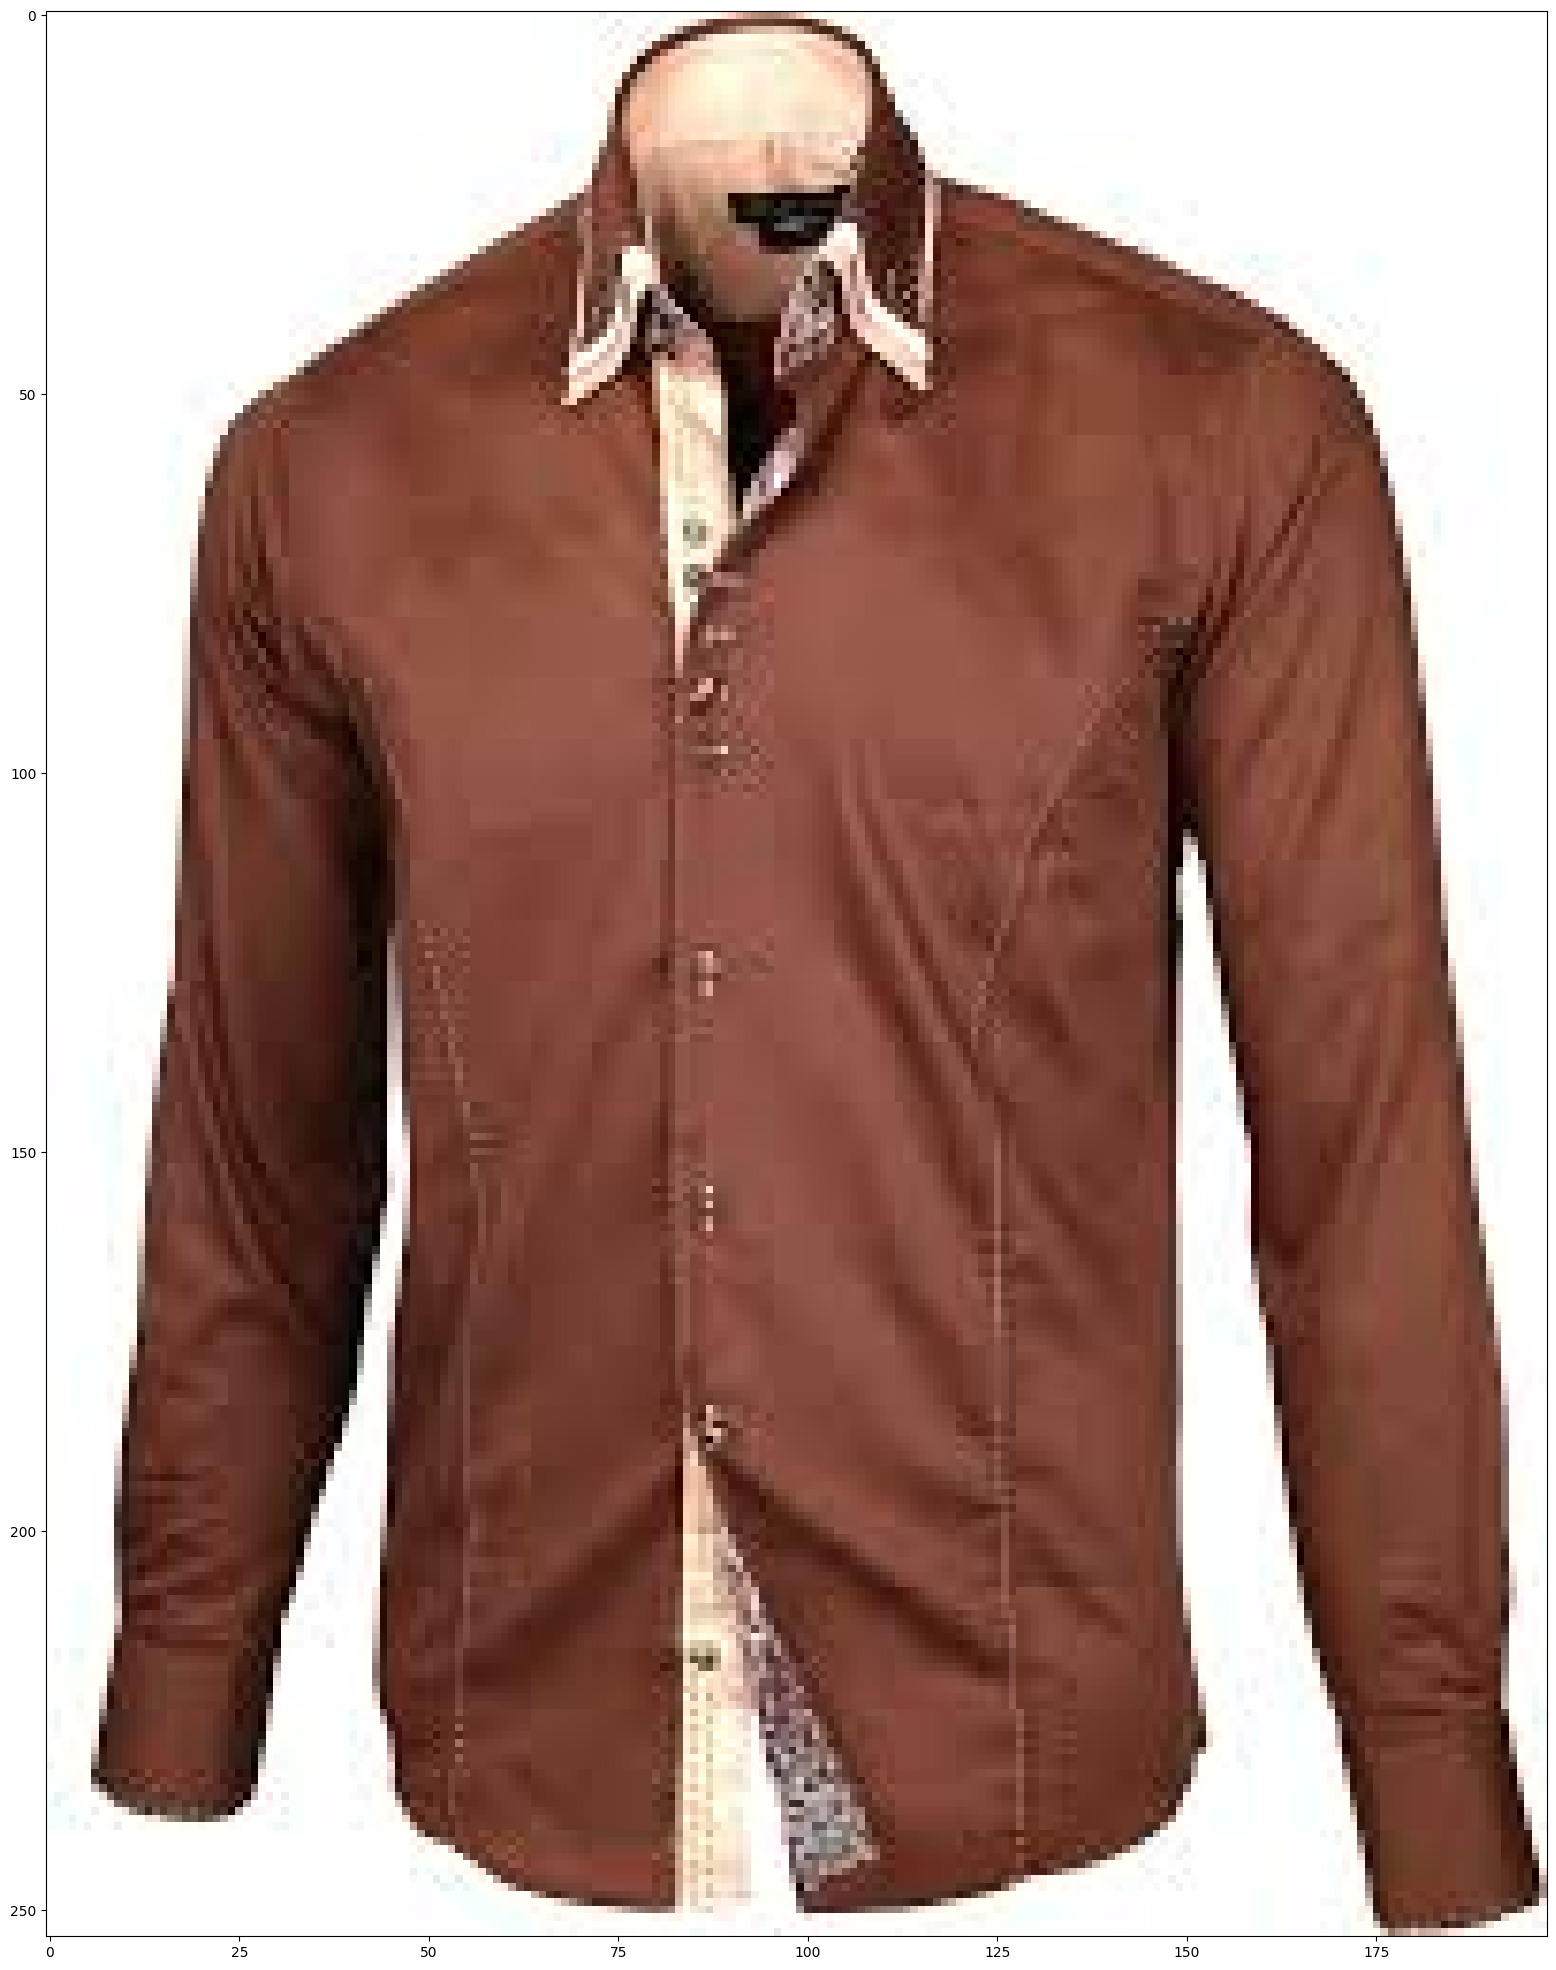

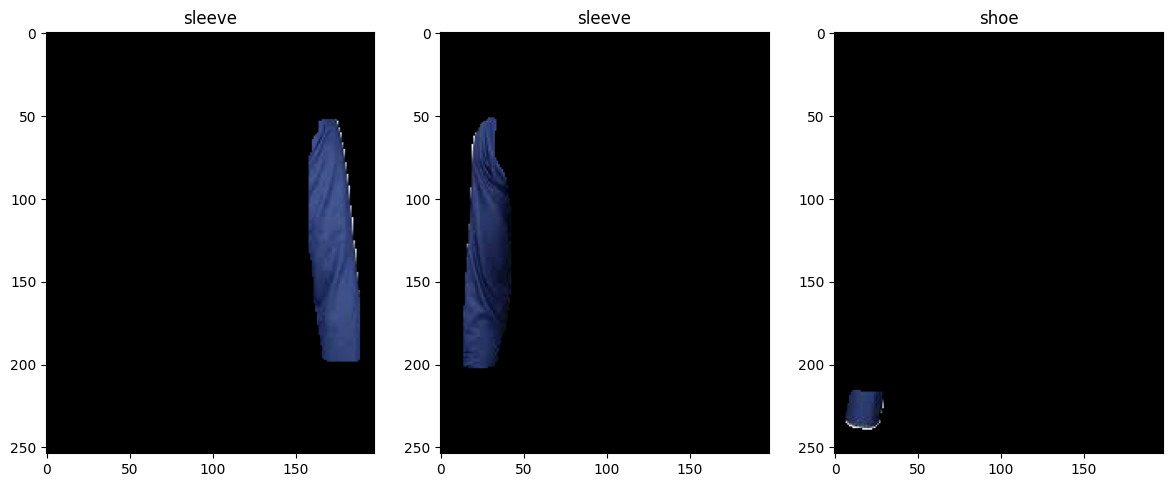

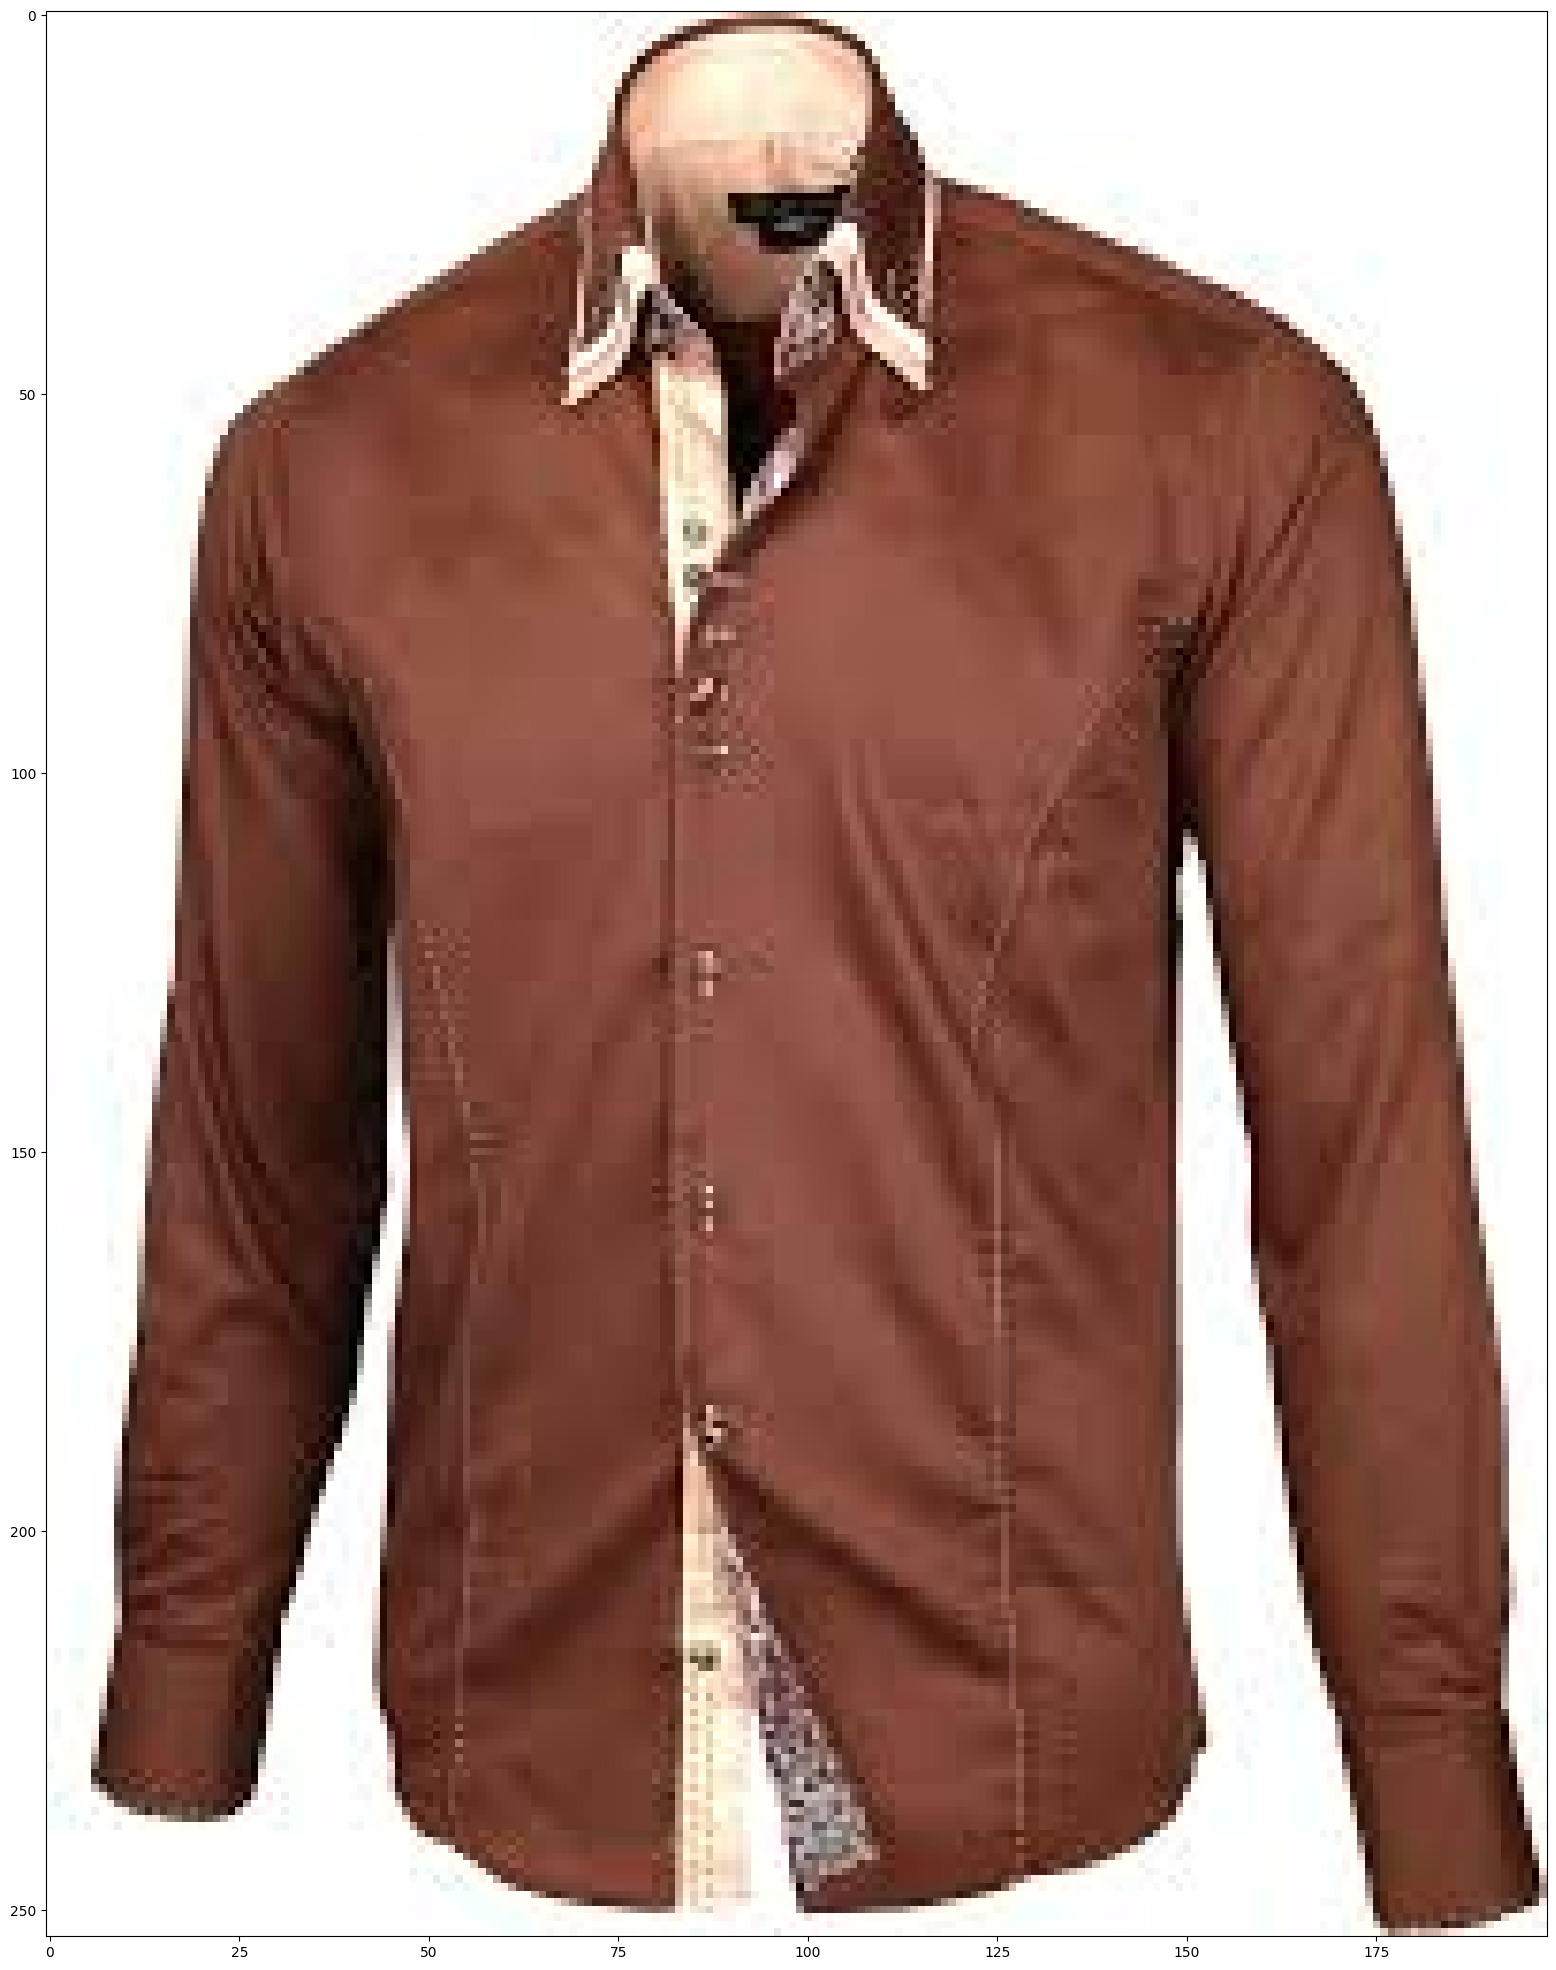

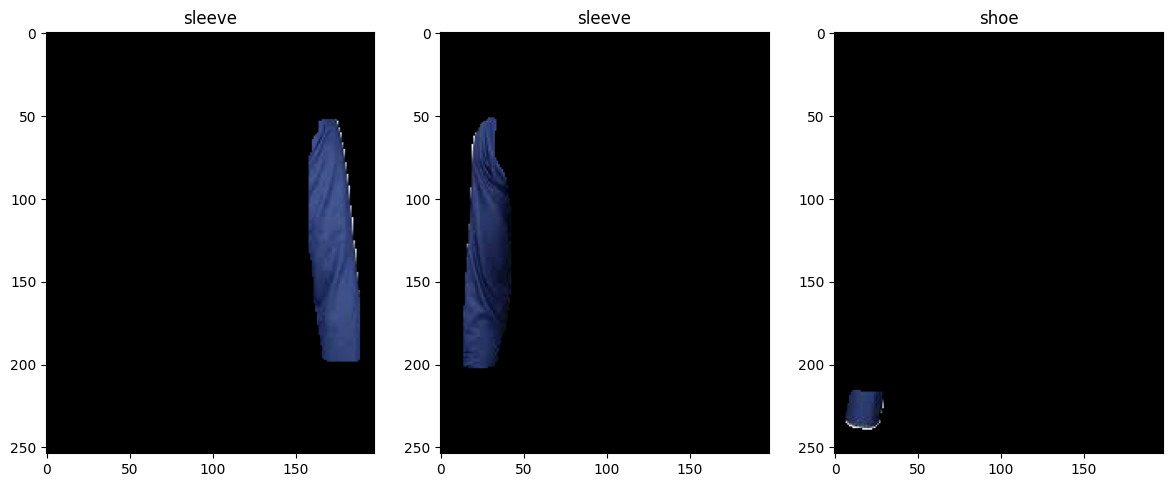

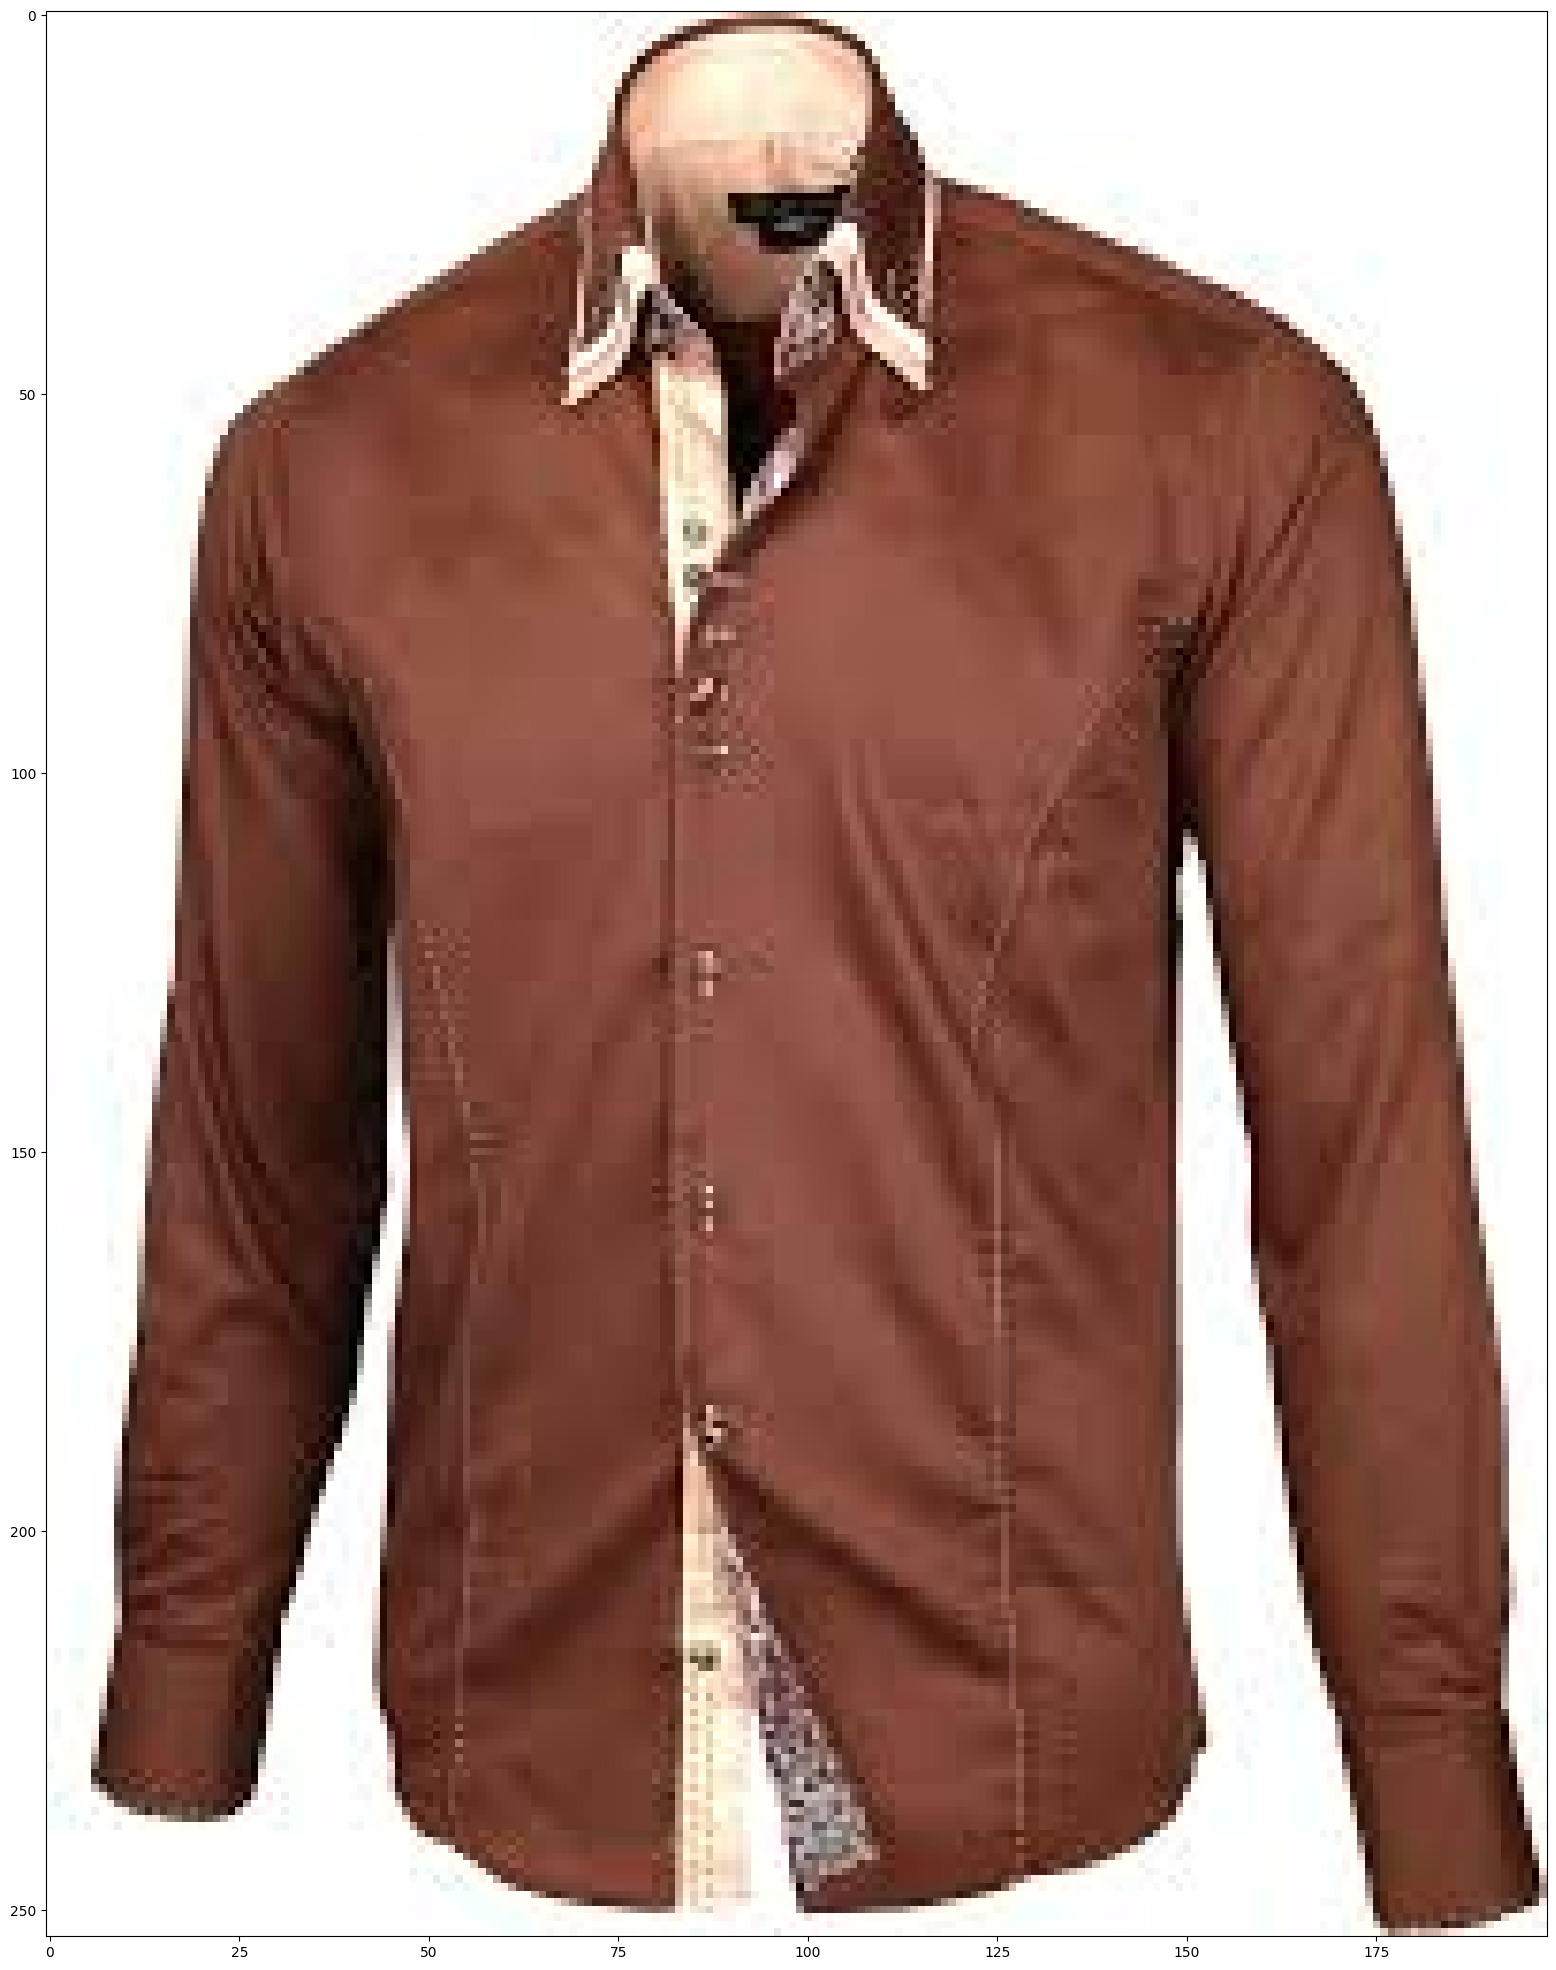

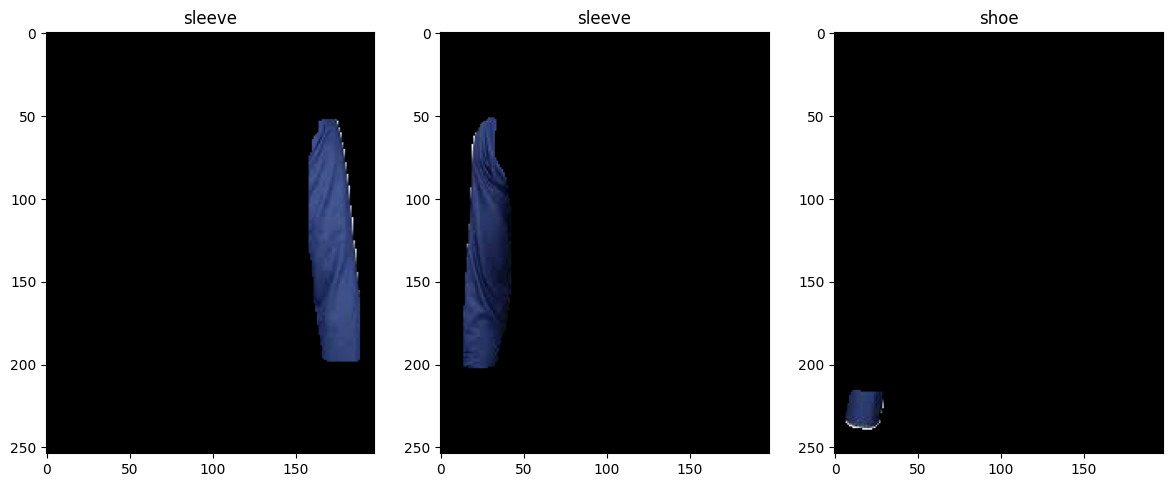

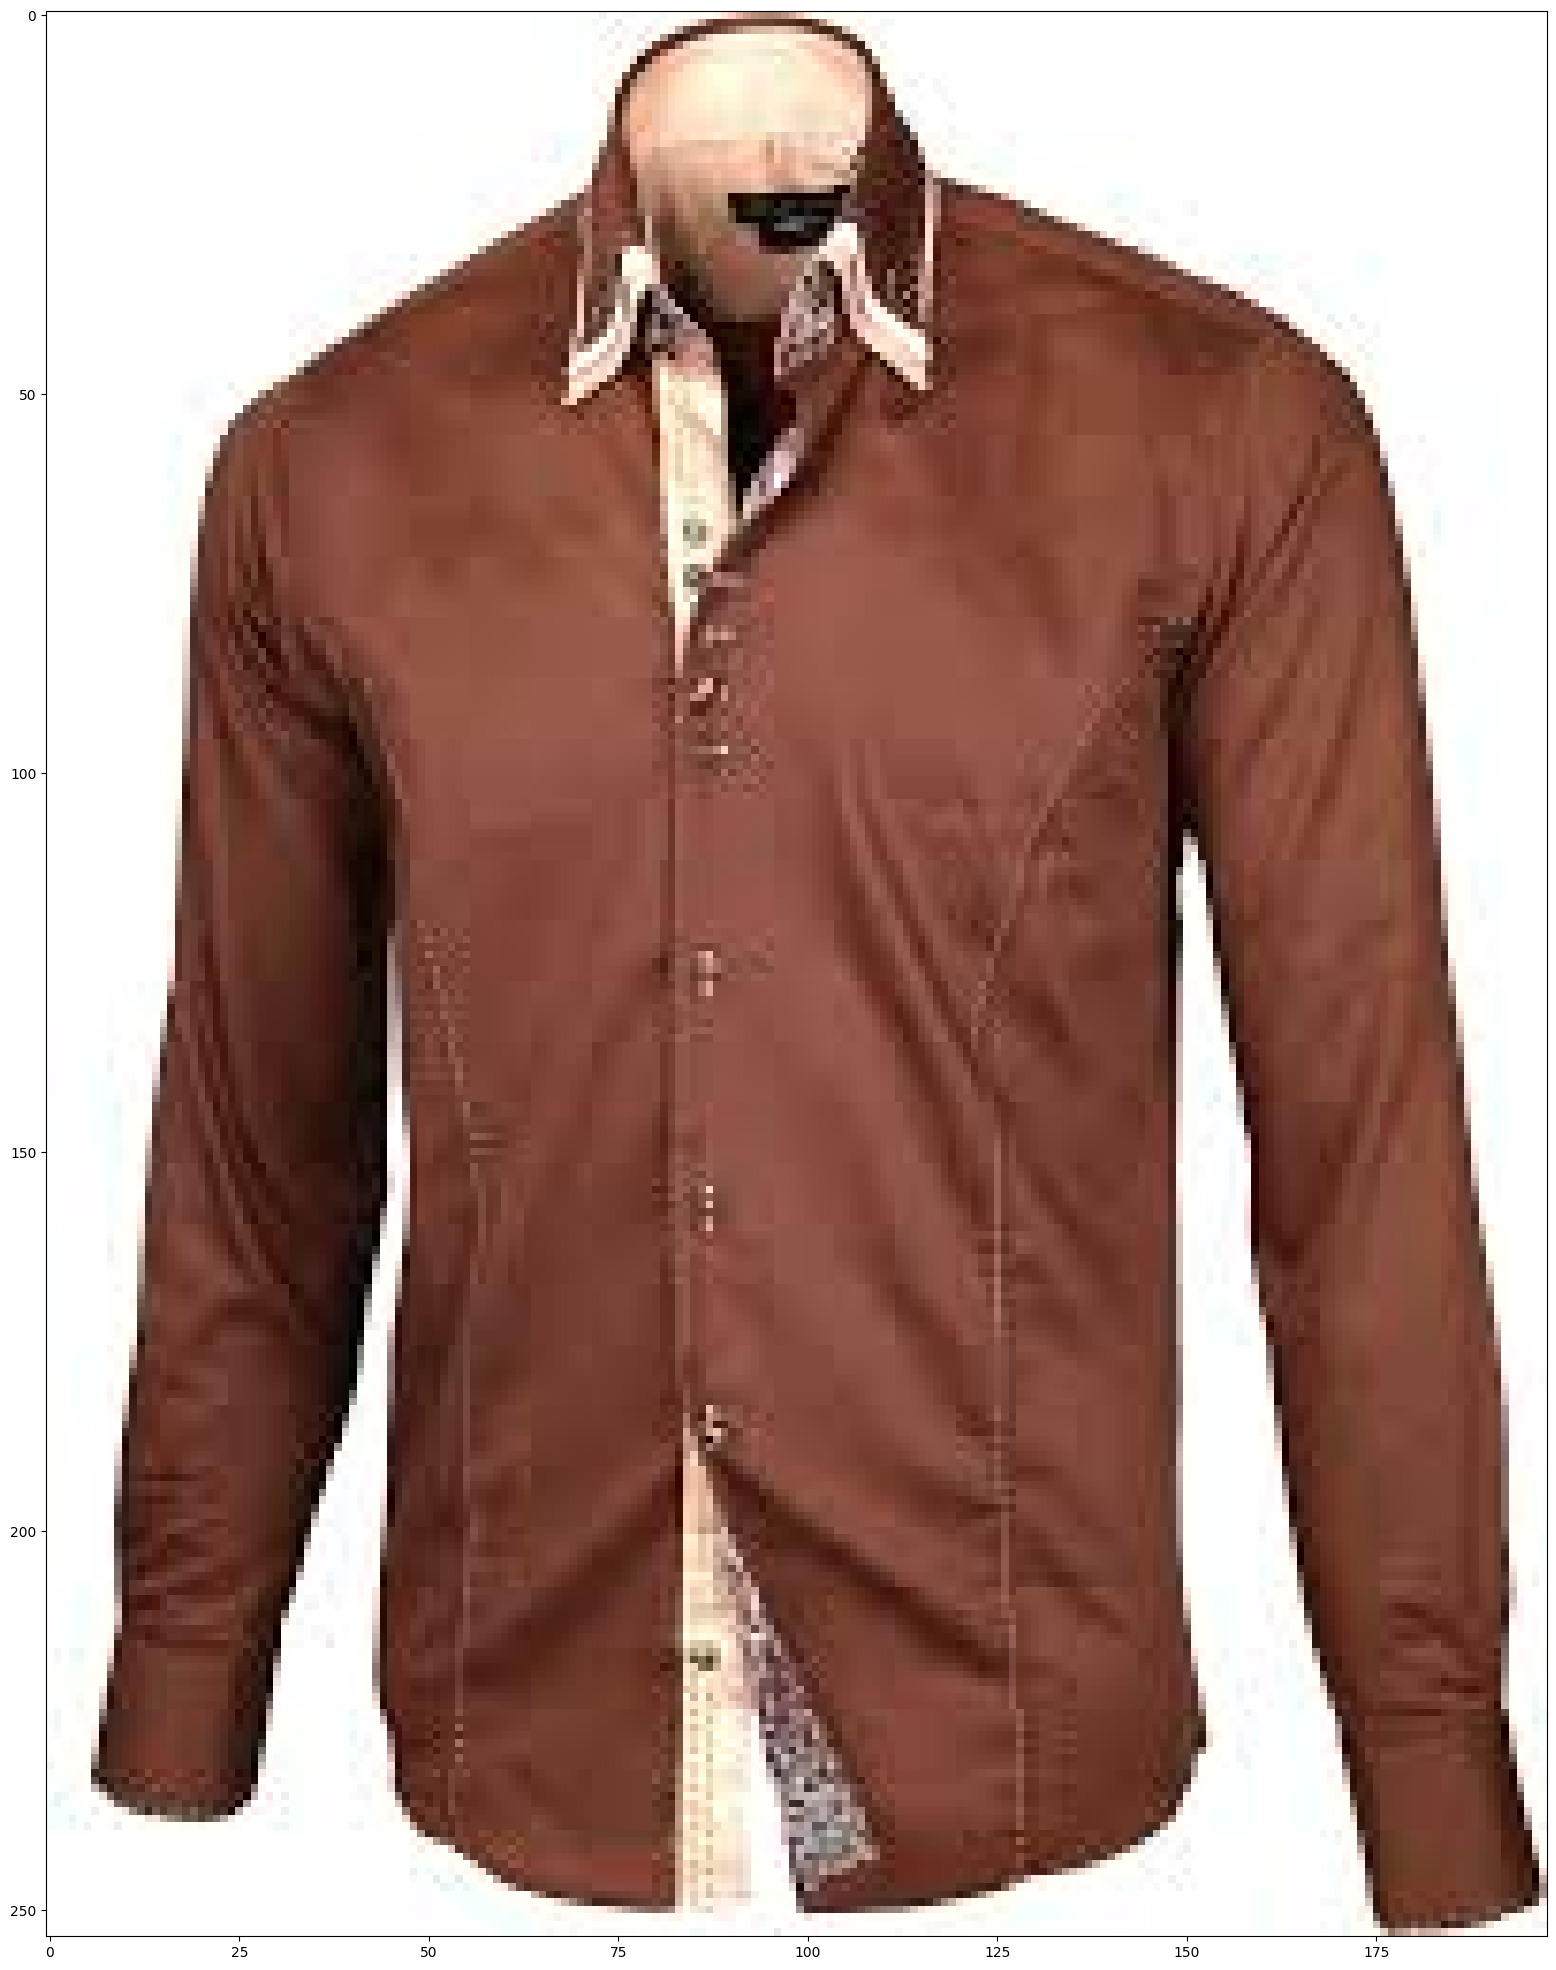

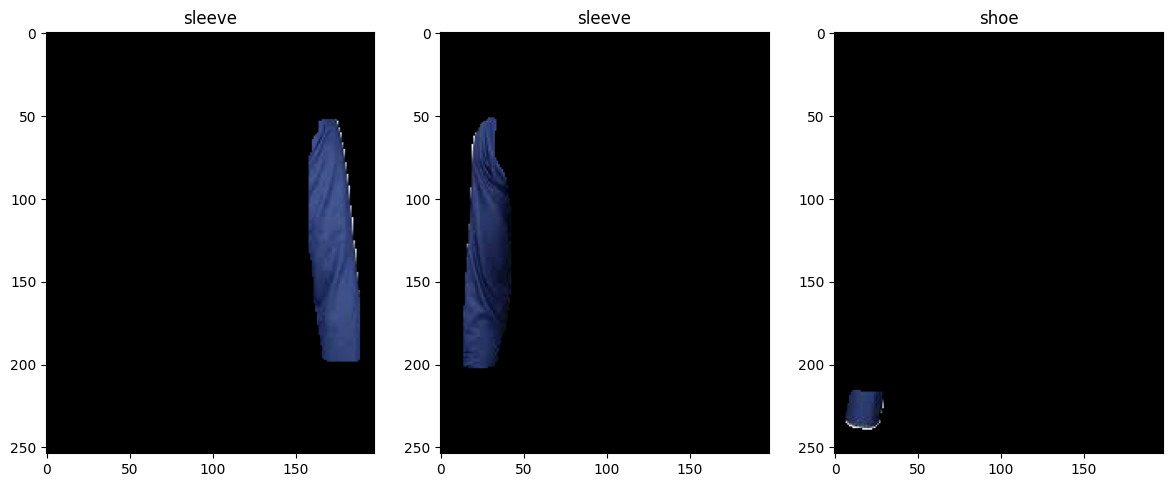

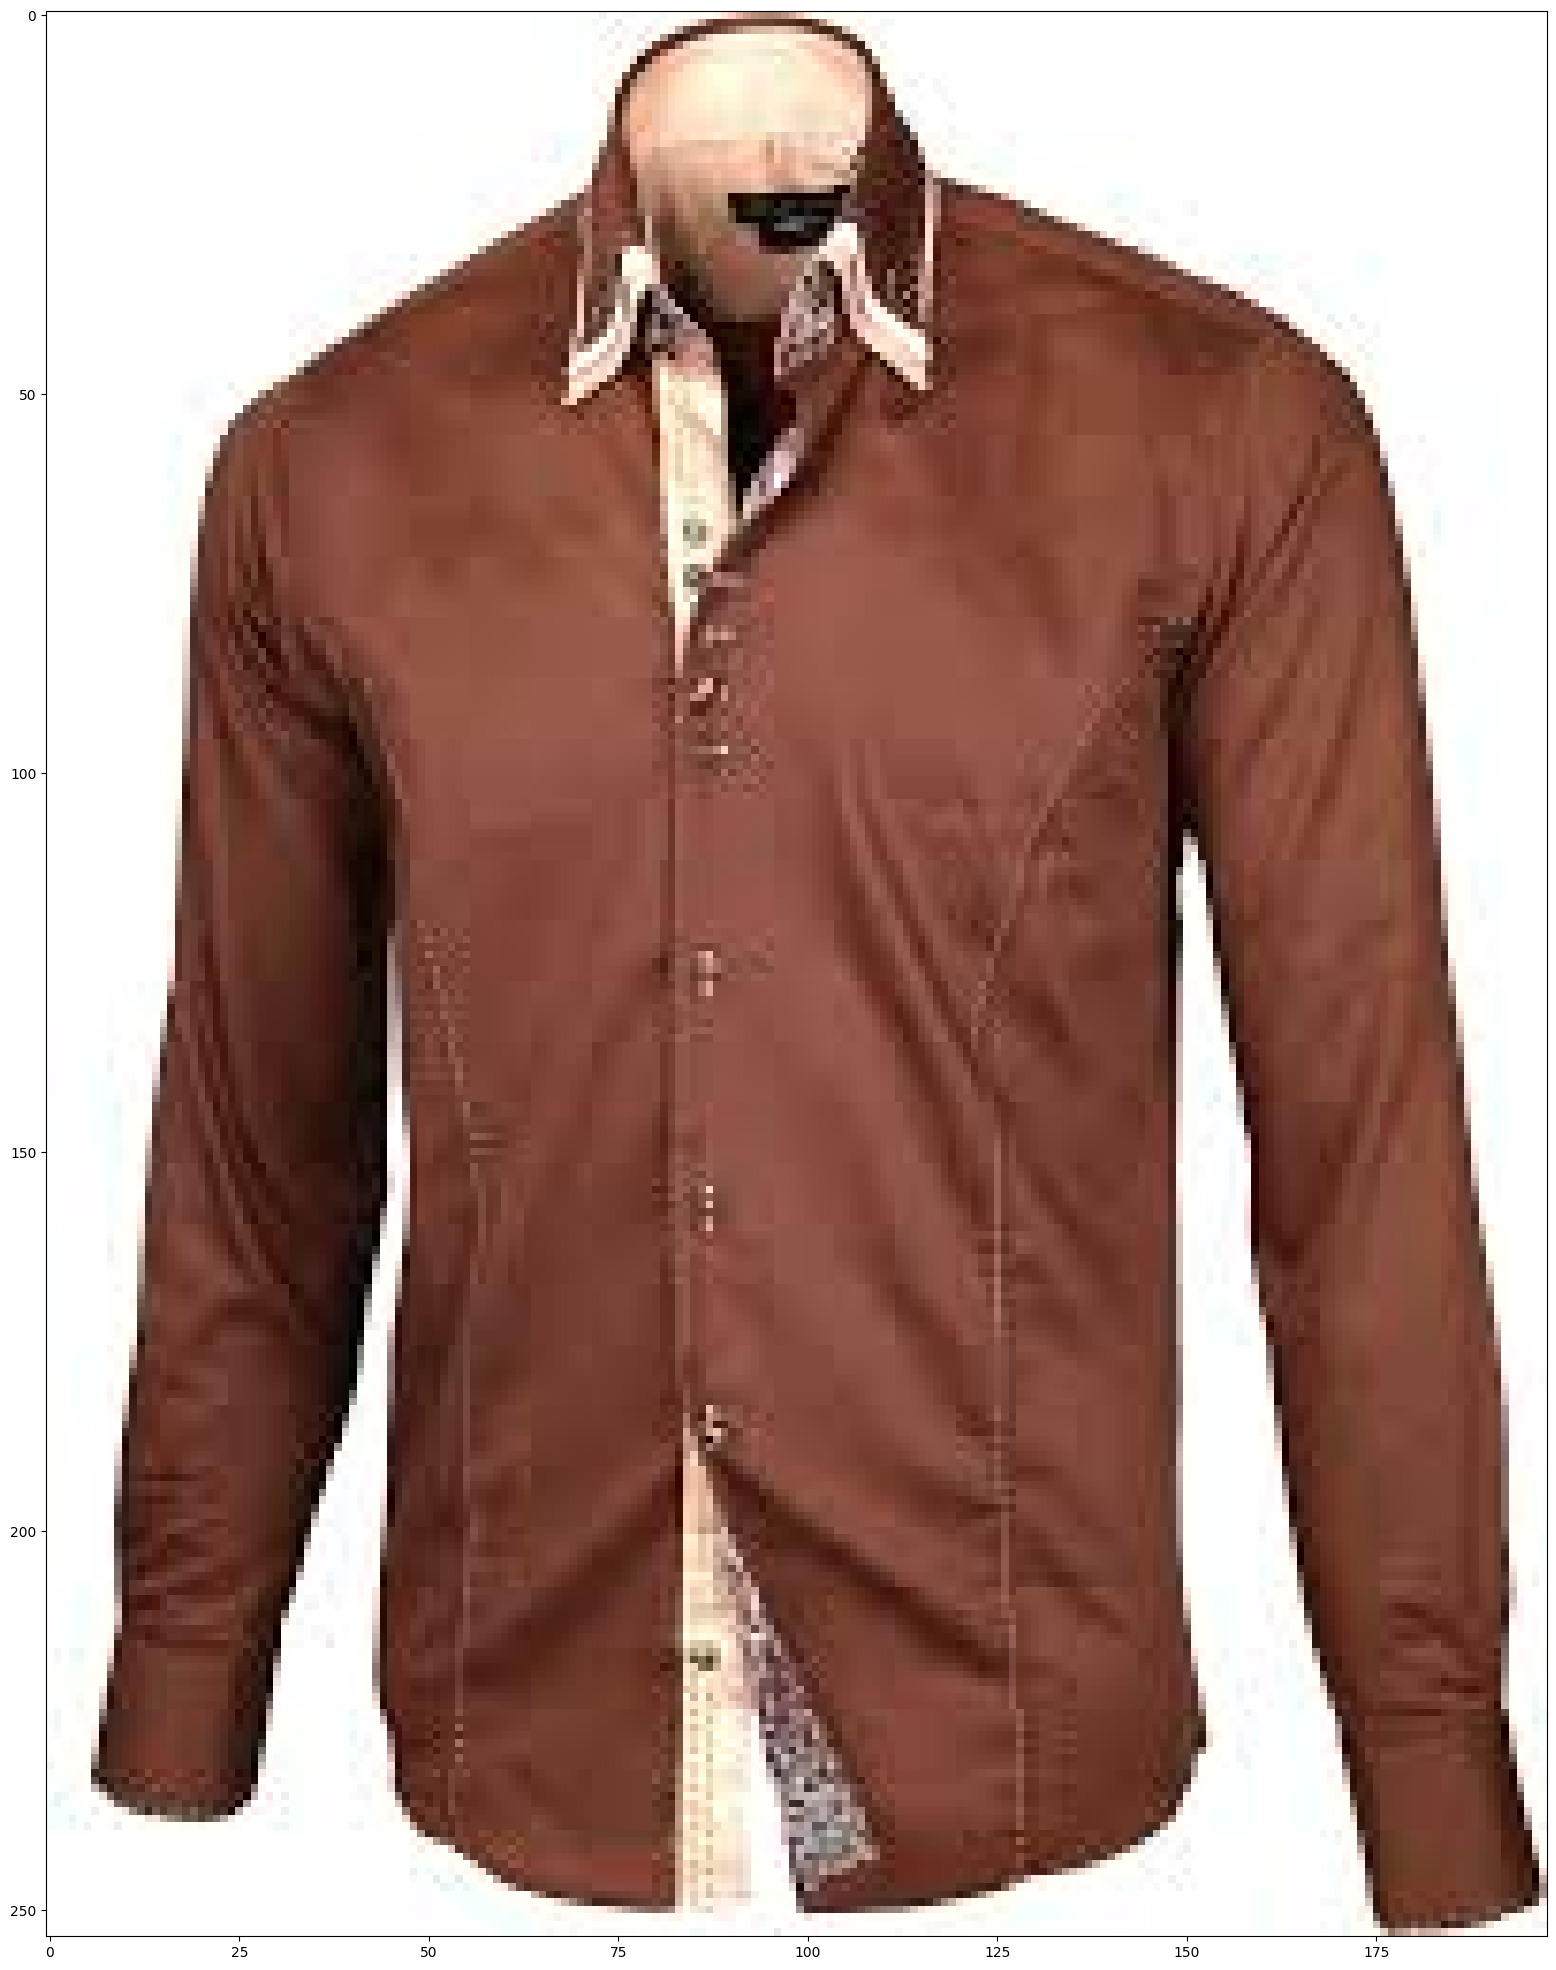

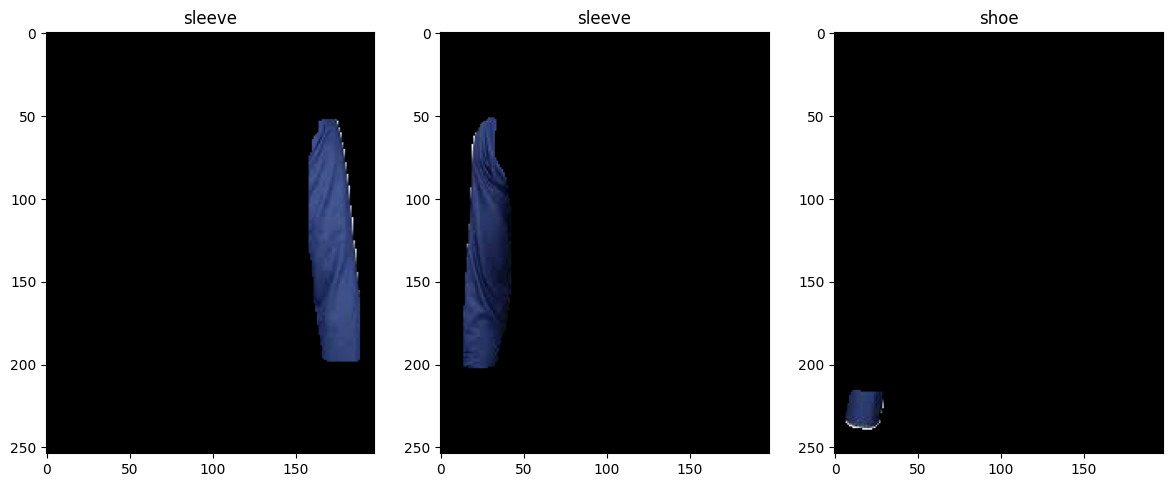

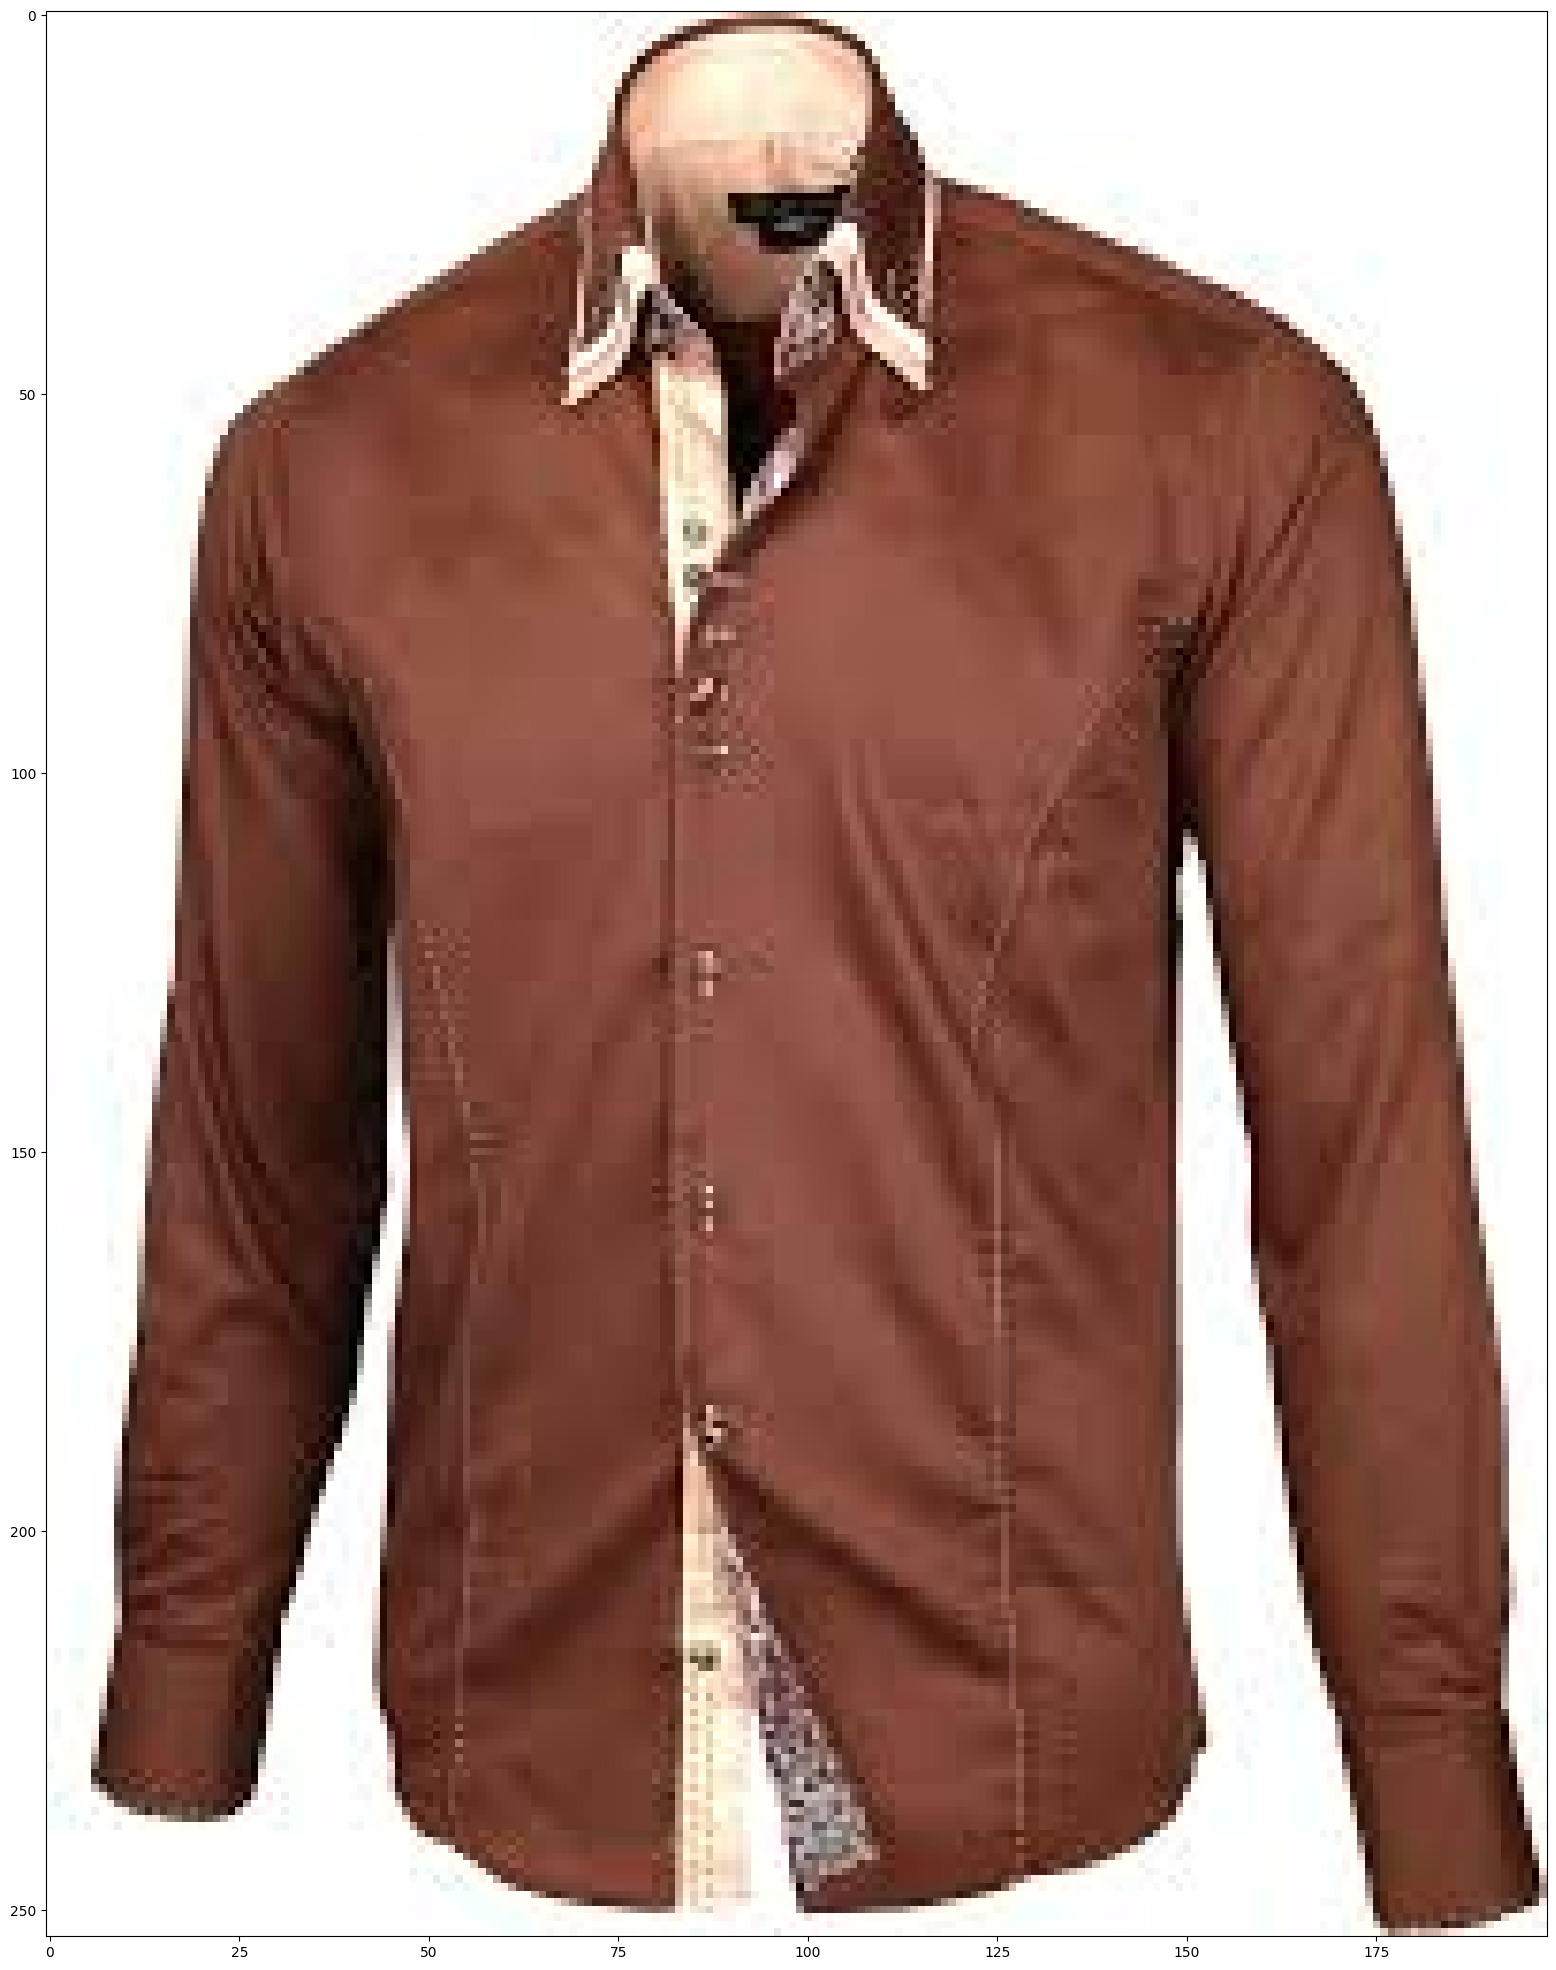

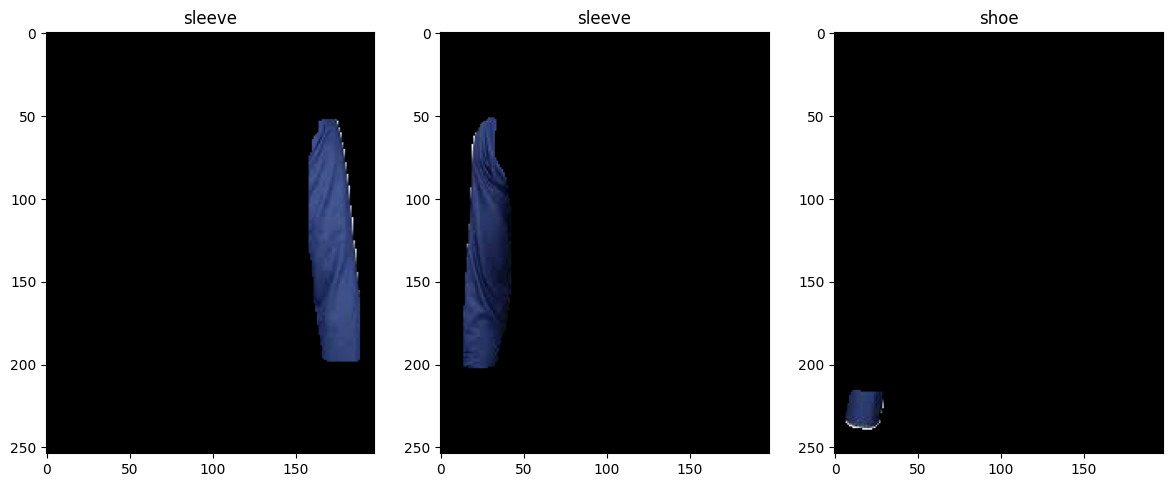

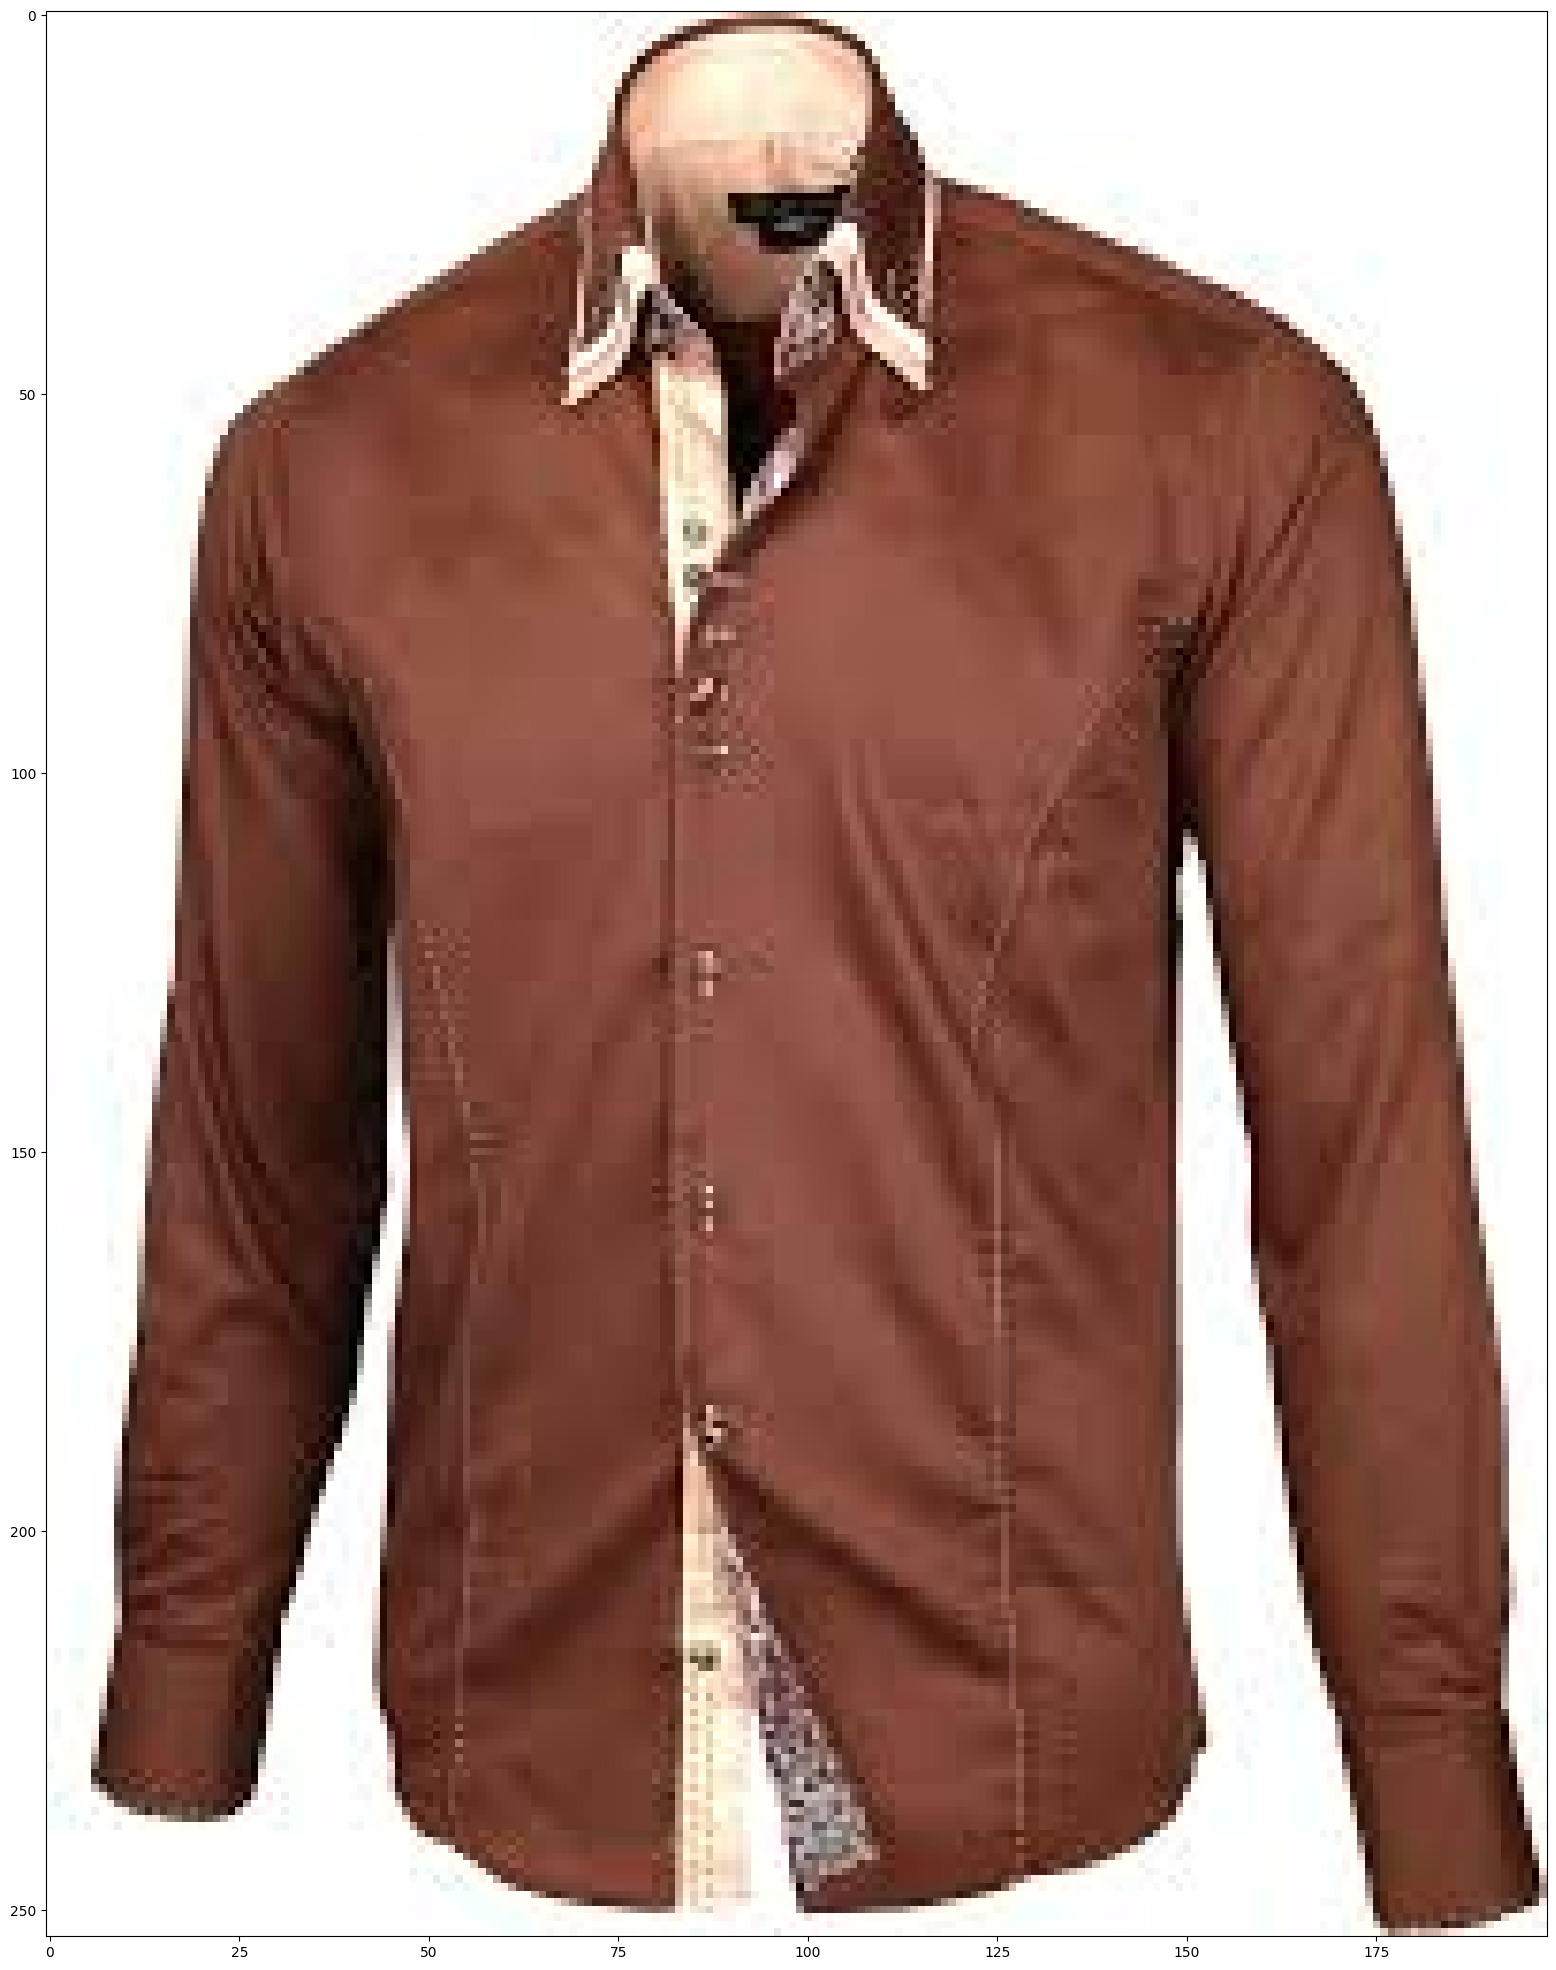

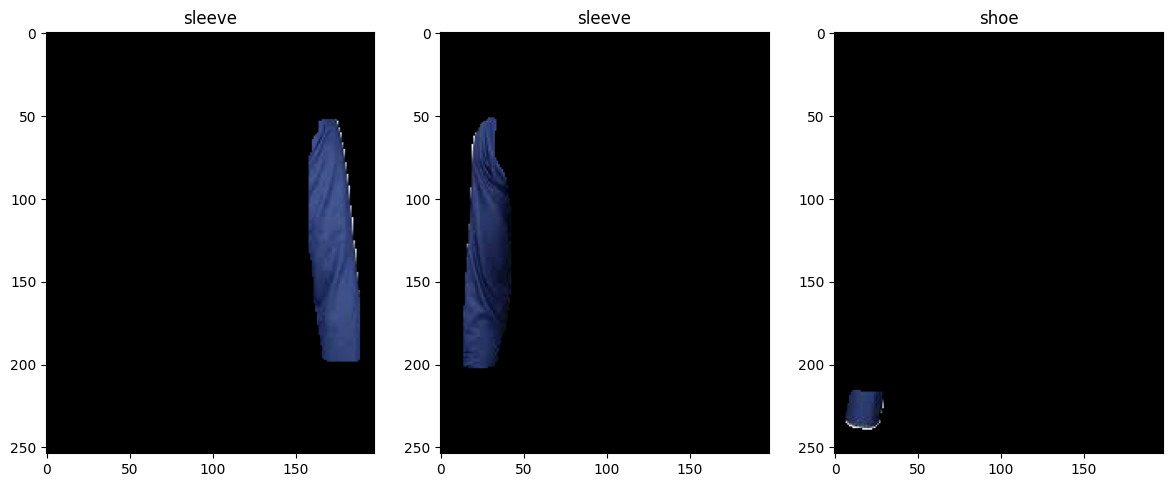

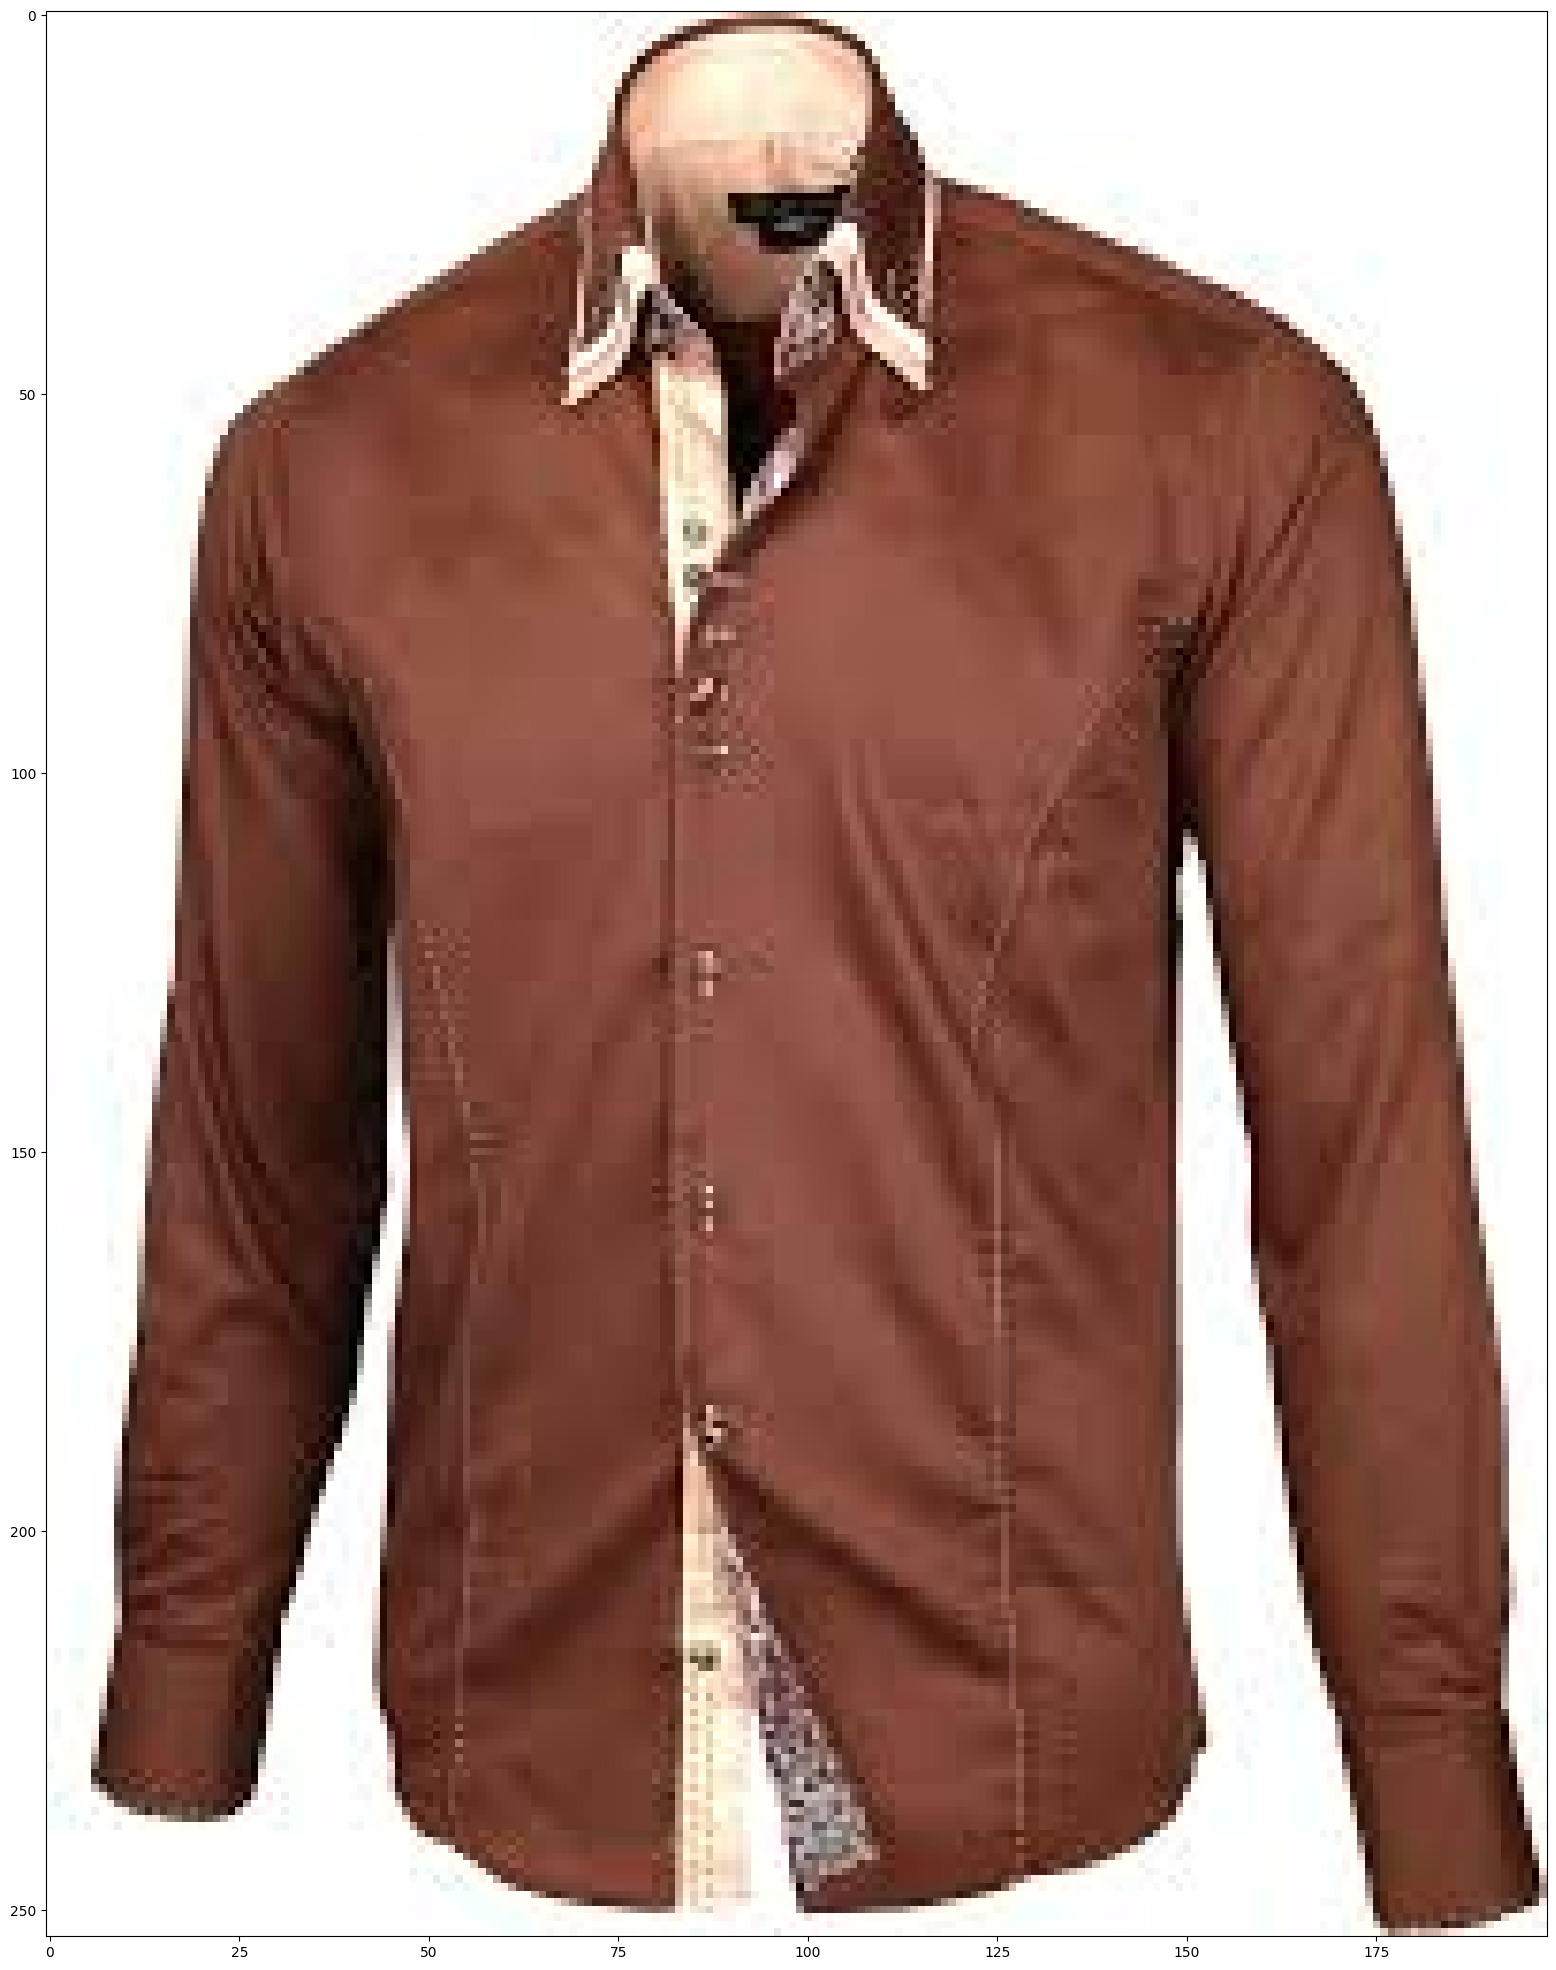

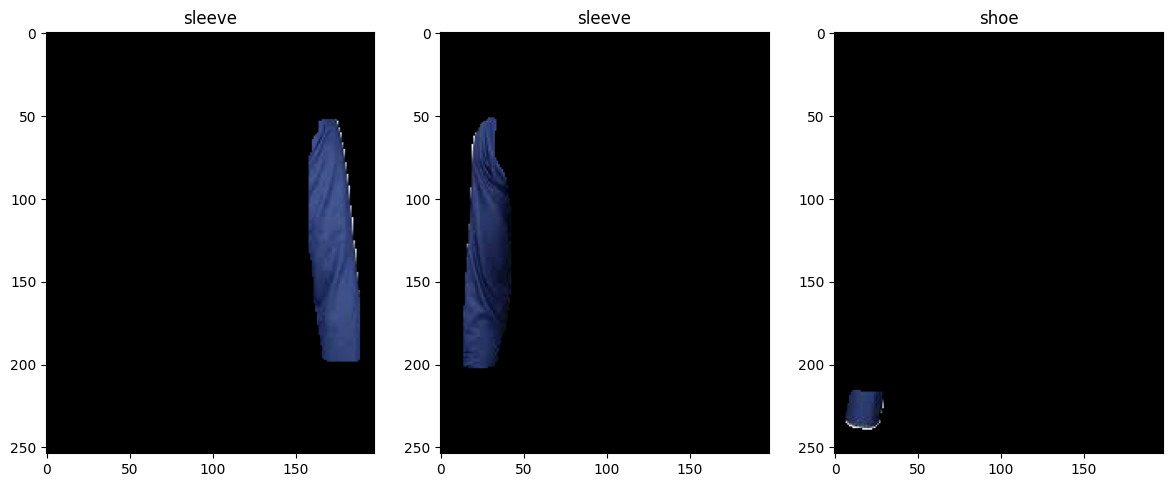

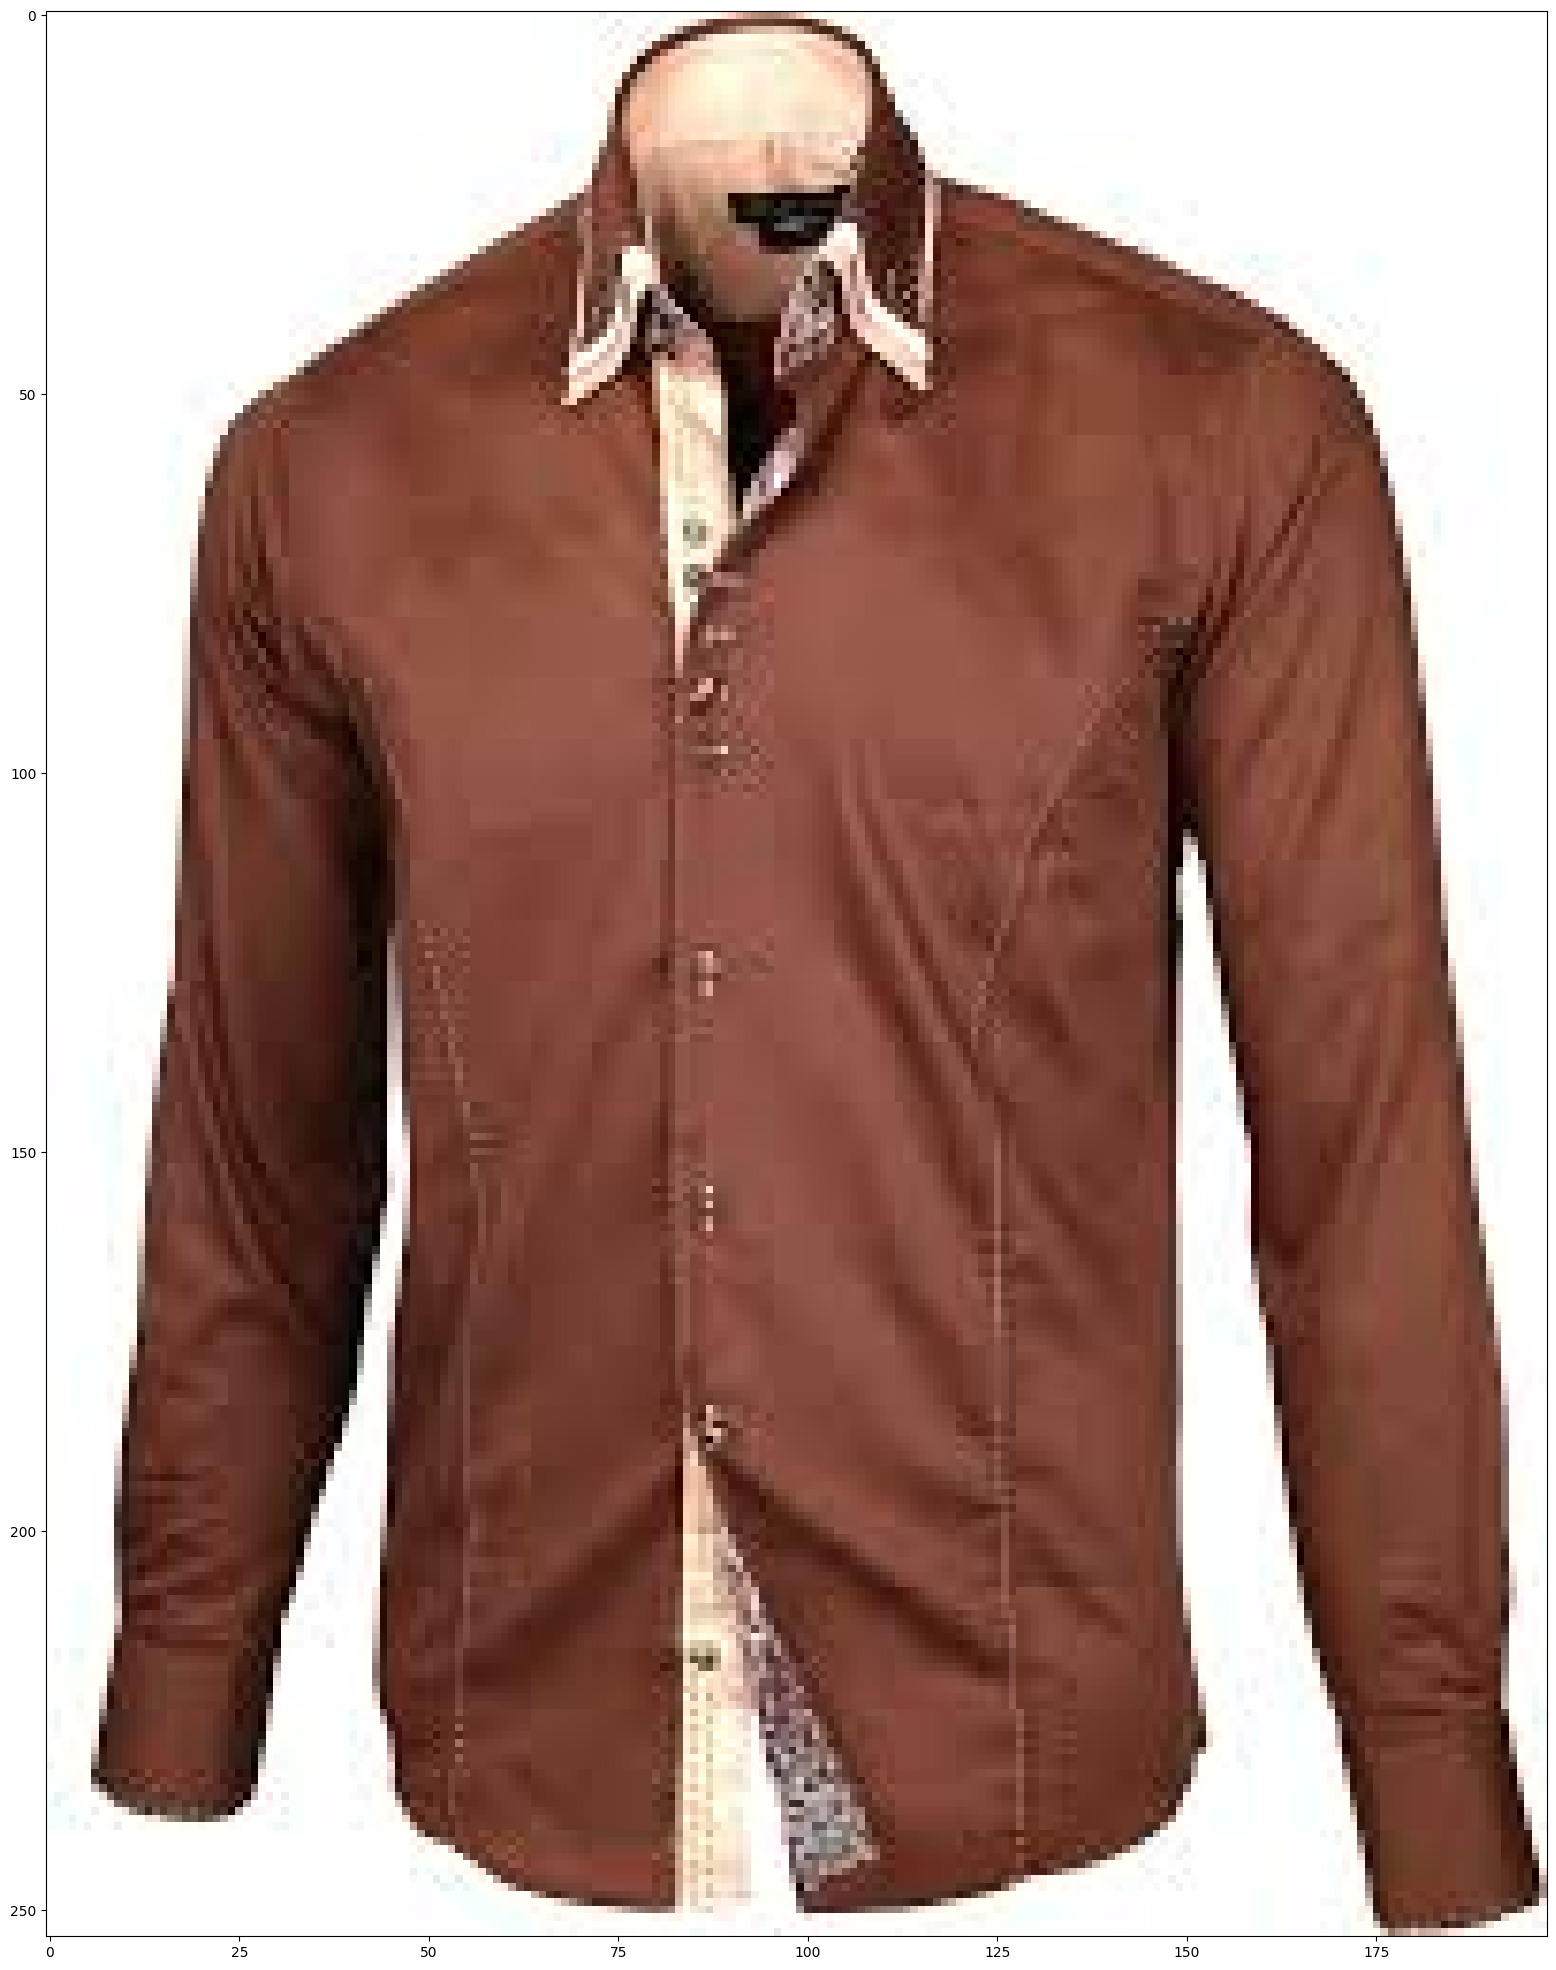

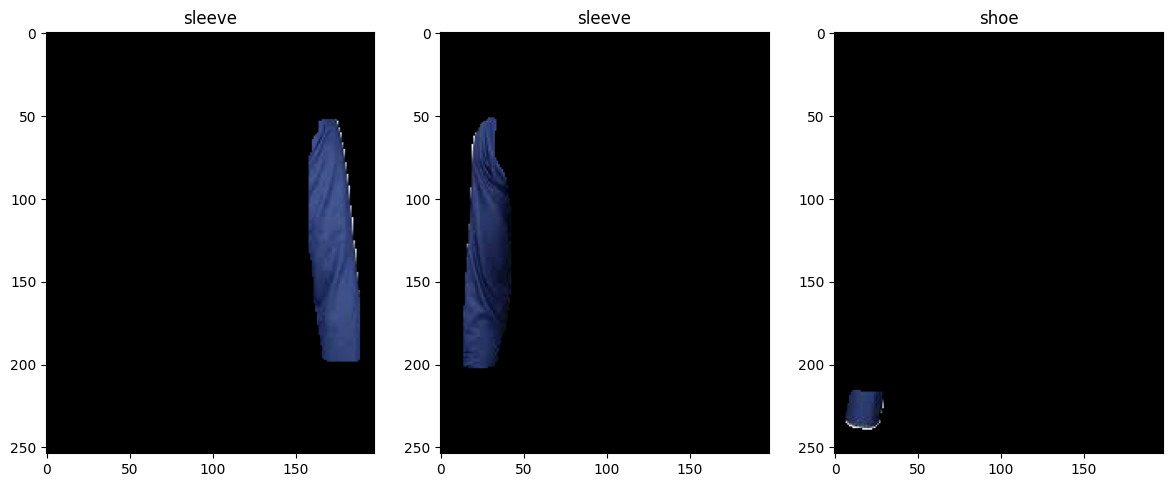

In [13]:
from pylab import imshow
import matplotlib.pyplot as plt

j = 0
for i in range(9):
    image_path = str("/home/rossignolle/Downloads/images/images.jpeg") #here 
    img = cv2.imread(image_path)
    plt.figure(figsize=(25, 25))
    plt.imshow(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    result = model.detect([resize_image(image_path)])
    r = result[0]
    
    if r['masks'].size > 0:
        masks = np.zeros((img.shape[0], img.shape[1], r['masks'].shape[-1]), dtype=np.uint8)
        for m in range(r['masks'].shape[-1]):
            masks[:, :, m] = cv2.resize(r['masks'][:, :, m].astype('uint8'), 
                                        (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
        
        y_scale = img.shape[0]/IMAGE_SIZE
        x_scale = img.shape[1]/IMAGE_SIZE
        rois = (r['rois'] * [y_scale, x_scale, y_scale, x_scale]).astype(int)
        
        masks, rois = refine_masks(masks, rois)
        masks.shape
        rois.shape
    else:
        masks, rois = r['masks'], r['rois']
    N = rois.shape[0]
    class_names = ['bg']+label_names
    columns = 10
    rows = 2
    plt.figure(figsize=(50, 50))
    for i in range(N):
      mask = masks[:, :, i]
      #print(r['class_ids'][i])
      result_image = cv2.bitwise_and(img, img, mask = mask)
      cv2.imwrite('/segImage' +'/img' + str(j+1) + '.png', result_image)
      plt.subplot(rows, columns, i+1)
      plt.title(class_names[r['class_ids'][i]])
      plt.imshow(result_image)
      j+= 1